<a href="https://colab.research.google.com/github/Caramel96/Samuel_BuckbyCE888/blob/main/lab3%20/%20bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, classification_report
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/Caramel96/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")

In [60]:
df.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,221,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,426,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,287,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,197,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [61]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [62]:
features_copy = df.iloc[ : , :-1 ]


In [63]:
features_copy.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [64]:
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)

In [94]:
y = df['y']

In [95]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

array([0, 0, 0, ..., 0, 1, 0])

In [96]:
features = features_copy.drop('duration', axis=1)
features.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [98]:
X = pd.get_dummies(features)
X.head(5)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


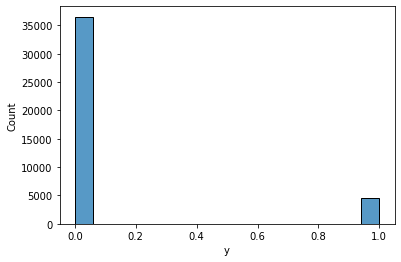

In [100]:
sns.histplot(y)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=50, stratify=y )

In [102]:
k_fold = StratifiedKFold(n_splits=10)

In [103]:
model = RandomForestClassifier(n_estimators = 100, max_depth= 3)

scores = cross_val_score(model, X_train, y_train, cv= k_fold, scoring = 'f1')

print('mean score', scores.mean())

mean score 0.23474102037547376


In [104]:
for i in range(len(scores)) :
  print('Fold',i+1,' ', scores[i])
  
print('mean score', scores.mean())

Fold 1   0.21973094170403587
Fold 2   0.20465116279069767
Fold 3   0.21363636363636362
Fold 4   0.2222222222222222
Fold 5   0.19724770642201833
Fold 6   0.255125284738041
Fold 7   0.29711751662971175
Fold 8   0.24608501118568232
Fold 9   0.24489795918367352
Fold 10   0.24669603524229075
mean score 0.23474102037547376


In [105]:
dummy_clf = DummyClassifier(strategy='stratified')

scores2 = cross_val_score(dummy_clf, X_train, y_train, cv= k_fold, scoring = 'f1')

print('mean score', scores2.mean())



mean score 0.1086232006401386


In [114]:
model2 = RandomForestClassifier()
param_grid = {'max_depth': np.arange(20,40,5), 'n_estimators': np.arange(80,140,20)}
grid = GridSearchCV(model2, param_grid, cv = k_fold, scoring = 'f1')

grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 25, 'n_estimators': 100}


In [123]:
forest = RandomForestClassifier(n_estimators = 100, max_depth= 25)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
X.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [128]:
features = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

Feature ranking:
1. age (0.139846)
2. euribor3m (0.126657)
3. campaign (0.072554)
4. nr.employed (0.046930)
5. pdays (0.033623)
6. emp.var.rate (0.029659)
7. cons.conf.idx (0.027749)
8. poutcome_success (0.026734)
9. cons.price.idx (0.025176)
10. housing_no (0.020644)
11. housing_yes (0.020488)
12. previous (0.019264)
13. job_admin. (0.017511)
14. marital_married (0.016588)
15. education_university.degree (0.016460)
16. education_high.school (0.015923)
17. day_of_week_mon (0.014901)
18. day_of_week_wed (0.014895)
19. marital_single (0.014802)
20. day_of_week_thu (0.014773)
21. day_of_week_tue (0.014445)
22. day_of_week_fri (0.014167)
23. loan_no (0.014097)
24. job_technician (0.013929)
25. loan_yes (0.013658)
26. education_professional.course (0.011817)
27. education_basic.9y (0.011217)
28. job_blue-collar (0.011034)
29. marital_divorced (0.010494)
30. poutcome_failure (0.009286)
31. job_management (0.009203)
32. job_services (0.008994)
33. contact_cellular (0.008933)
34. contact_telep

In [132]:
y_pred = forest.predict(X_test)
f1_score(y_test,y_pred)

0.3969035890218156